# class_freq

In [2]:
import os
import pickle


def get_pkl_file(path):
    if os.path.exists(path):
        with open(path, "rb") as file:
            data = pickle.load(file)
    else:
        print("File not found at path:", path)
    return data


In [ ]:
class_freq = get_pkl_file("appendix/coco/longtail2017/class_freq.pkl")
class_freq

# class_freq = number of positive samples for each labels
# neg_class_freq = number of negative samples for each labels
# condition_prob

In [5]:
len(class_freq["condition_prob"][0])

80

In [6]:
sum(class_freq["condition_prob"][0][1:])

3.4654255319148928

In [23]:
import numpy as np

# array is 2d
def calculate_ratio(array: np.array, base_index: int, target_index: int):
    # Ensure the array is a 2D numpy array
    array = np.array(array)

    # Count of indices where both array[0][i] == 1 and array[1][i] == 1
    shared_count = np.sum((array[:,base_index] == 1) & (array[:,target_index] == 1))

    # Count of indices where array[0][i] == 1
    total_count = np.sum(array[:,base_index] == 1)

    # Avoid division by zero
    if total_count == 0:
        return 0
    else:
        return shared_count / total_count
def calculate_ratio_base_index(array: np.array, base_index: int):
    array = np.array(array)
    return np.array([calculate_ratio(array, base_index, i) for i in range(array.shape[1])])

def calculate_ratio_all(array: np.array):
    array = np.array(array)
    return np.array([calculate_ratio_base_index(array, i) for i in range(array.shape[1])])

In [28]:
False  in (calculate_ratio_all(class_freq["gt_labels"]) == class_freq["condition_prob"])

False

In [ ]:
class_freq["gt_labels"][:][1]

# class_split.pkl

In [3]:
class_split = get_pkl_file("appendix/coco/longtail2017/class_split.pkl")
class_split

{'head': {0,
  2,
  24,
  26,
  39,
  41,
  42,
  43,
  44,
  45,
  56,
  57,
  58,
  60,
  62,
  63,
  67,
  69,
  71,
  72,
  73,
  75},
 'middle': {1,
  3,
  5,
  7,
  8,
  9,
  13,
  15,
  16,
  25,
  27,
  28,
  32,
  34,
  35,
  38,
  40,
  46,
  47,
  48,
  49,
  50,
  51,
  53,
  55,
  59,
  61,
  64,
  65,
  66,
  68,
  74,
  77},
 'tail': {4,
  6,
  10,
  11,
  12,
  14,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  29,
  30,
  31,
  33,
  36,
  37,
  52,
  54,
  70,
  76,
  78,
  79}}

In [31]:
type(class_split['middle'])

set

# longtail2017class_split

In [52]:
terse_gt = get_pkl_file("appendix/coco/terse_gt_2017.pkl")
terse_gt

{'gt_labels': [array([1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0]),
  array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
         0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
  array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
   

In [35]:
len(terse_gt["idx2img_id"] )

118287

# annotations

In [59]:
import json
from typing import List

def fileter_annotation(desired_labels: List[str], annotation_path: str,output_file_path: str):


    # COCO's standard 80 class names
    coco_labels = [
        'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck',
        'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench',
        'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe',
        'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis',
        'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard',
        'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon',
        'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog',
        'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table',
        'toilet', 'TV', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave',
        'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
        'teddy bear', 'hair drier', 'toothbrush'
    ]


    # Find the original indices of the desired labels
    

    # Create a mapping from original COCO indices to new indices (keeping their order relative to their original index)
    

    # Load COCO annotation file
    with open(annotation_path, "r") as f:
        data = json.load(f)

    label_to_original_index  = {}

    for c in data["categories"]:
        label_to_original_index[c["name"]] = c["id"]  # Map the original COCO index to its corresponding label name
    desired_indices = set([label_to_original_index[label] for label in desired_labels])

    # Filter only annotations belonging to desired categories and reassign indices
    filtered_annotations = []
 
    for ann in data['annotations']:
        if ann['category_id'] in desired_indices:
            filtered_annotations.append(ann)

    # Filter the categories list to only include the desired categories with their new indices
    filtered_categories = []
    for c in data["categories"]:
        if c['id'] in desired_indices:
            filtered_categories.append(c)

    # Create new JSON structure with filtered annotations and categories
    filtered_data = {
        "images": data["images"],  # Keep original image information
        "annotations": filtered_annotations,
        "categories": filtered_categories
    }

    if not os.path.exists(output_file_path):
        if os.path.dirname(output_file_path) != "" and os.path.dirname(output_file_path) != ".":
            os.makedirs(os.path.dirname(output_file_path))  # Create directory if it doesn't exist
    # Write to a new JSON file
    with open(output_file_path, "w") as f:
        json.dump(filtered_data, f)

    print("Filtered annotations saved to 'filtered_annotations.json'")


In [60]:
import pandas as pd
annotation_path = "/home/mark/Desktop/工研院/multi-label_classification/data/coco/annotations/instances_val2017.json"
label_path = "/home/mark/Desktop/工研院/multi-label_classification/data/coco/group1_test_data.csv"
labels = pd.read_csv(label_path, index_col=0).columns
output_path = "instances_val2017_group2.json"
fileter_annotation(labels, annotation_path, output_path)


Filtered annotations saved to 'filtered_annotations.json'


In [56]:
def get_label_with_original_order(label_list: List[str]):

    coco_labels = ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
                'train', 'truck', 'boat', 'traffic_light', 'fire_hydrant',
                'stop_sign', 'parking_meter', 'bench', 'bird', 'cat', 'dog',
                'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe',
                'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
                'skis', 'snowboard', 'sports_ball', 'kite', 'baseball_bat',
                'baseball_glove', 'skateboard', 'surfboard', 'tennis_racket',
                'bottle', 'wine_glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
                'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot',
                'hot_dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
                'potted_plant', 'bed', 'dining_table', 'toilet', 'tv', 'laptop',
                'mouse', 'remote', 'keyboard', 'cell_phone', 'microwave',
                'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock',
                'vase', 'scissors', 'teddy_bear', 'hair_drier', 'toothbrush']

    wanted_label = set(label_list)
    new_label = []

    for l in coco_labels:
        if l in wanted_label:
            new_label.append(l)
    return new_label

['person', 'bottle', 'cup', 'bowl', 'chair', 'book']

In [61]:
print(len(['person', 'car', 'backpack', 'handbag', 'bottle', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'chair', 'couch', 'potted_plant', 'dining_table', 'tv', 'laptop', 'cell_phone', 'oven', 'sink', 'refrigerator', 'book', 'vase']))

22


In [62]:
print(len(['bicycle', 'motorcycle', 'bus', 'truck', 'boat', 'traffic_light', 'bench', 'cat', 'dog', 'umbrella', 'tie', 'suitcase', 'sports_ball', 'baseball_bat', 'baseball_glove', 'tennis_racket', 'wine_glass', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'pizza', 'cake', 'bed', 'toilet', 'mouse', 'remote', 'keyboard', 'microwave', 'clock', 'teddy_bear']))

33


In [63]:
print(len(['airplane', 'train', 'fire_hydrant', 'stop_sign', 'parking_meter', 'bird', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'frisbee', 'skis', 'snowboard', 'kite', 'skateboard', 'surfboard', 'hot_dog', 'donut', 'toaster', 'scissors', 'hair_drier', 'toothbrush']))

25


In [64]:
my_head = ['person', 'dining table', 'chair', 'cup', 'bottle', 'bowl', 'book', 'car', 'sink', 'knife', 'tv', 'handbag', 'oven', 'spoon', 'potted plant', 'couch', 'laptop', 'cell phone', 'fork', 'refrigerator', 'vase', 'backpack']

db_head = ['person', 'car', 'backpack', 'handbag', 'bottle', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'chair', 'couch', 'potted_plant', 'dining_table', 'tv', 'laptop', 'cell_phone', 'oven', 'sink', 'refrigerator', 'book', 'vase']

for l in my_head:
    if l not in db_head:
        print(f'Warning: {l} not in db_head')

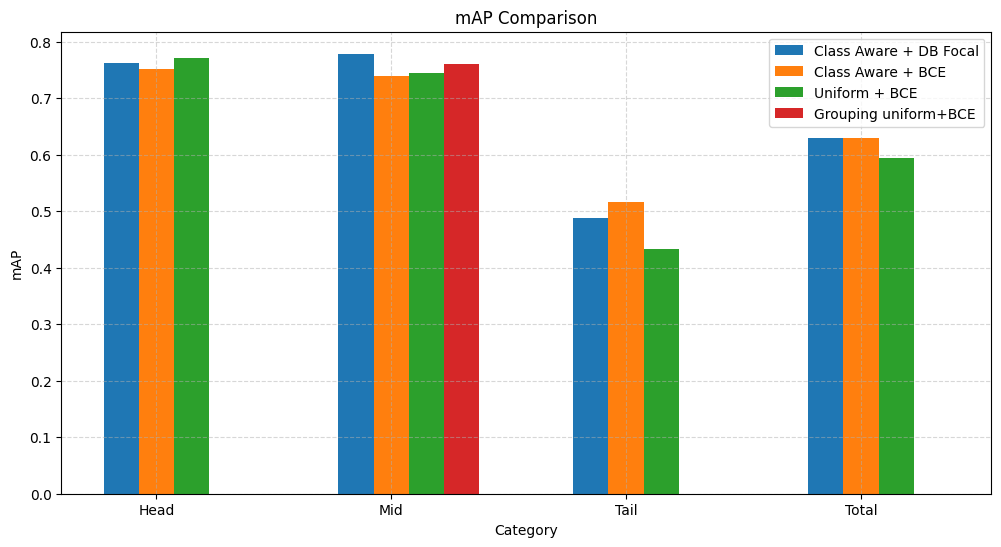

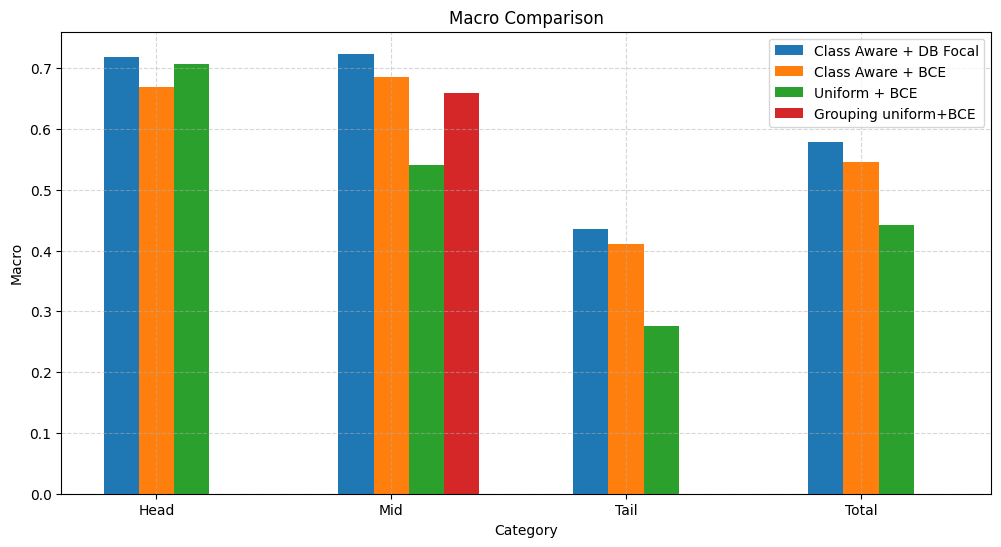

In [8]:
# Providing the code used to draw the graphs

import matplotlib.pyplot as plt
import numpy as np

# Data
categories = ['Head', 'Mid', 'Tail', 'Total']
settings = ['Class Aware + DB Focal', 'Class Aware + BCE', 'Uniform + BCE', 'Grouping uniform+BCE']

map_values = [
    [0.7615, 0.7784, 0.4874, 0.6295],  # Class Aware + DB Focal
    [0.7514, 0.7390, 0.5163, 0.6301],  # Class Aware + BCE
    [0.7702, 0.7443, 0.4325, 0.5936],   # Uniform + BCE
    [0, 0.7602, 0, 0]  # grouping uniform+BCE
]

macro_values = [
    [0.7189, 0.7237, 0.4355, 0.5786],  # Class Aware + DB Focal
    [0.6683, 0.6861, 0.4111, 0.5451],  # Class Aware + BCE
    [0.7075, 0.5403, 0.2758, 0.4415],   # Uniform + BCE
    [0,0.6599,0,0]  # grouping uniform+BCE
]

x = np.arange(len(categories))
width = 0.15

# Plot mAP
plt.figure(figsize=(12, 6))
for i, setting in enumerate(settings):
    plt.bar(x + i * width, map_values[i], width, label=setting)

plt.xlabel('Category')
plt.ylabel('mAP')
plt.title('mAP Comparison')
plt.xticks(x + width, categories)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Plot Macro
plt.figure(figsize=(12, 6))
for i, setting in enumerate(settings):
    plt.bar(x + i * width, macro_values[i], width, label=setting)

plt.xlabel('Category')
plt.ylabel('Macro')
plt.title('Macro Comparison')
plt.xticks(x + width, categories)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


